In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('beds.csv')

In [3]:
df.head(10)

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care
0,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Medical/Surgical Acute (includes GYN/DOU),30660.0,2835.0,11297.0,0
1,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Pediatric Acute,0.0,0.0,0.0,0
2,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326
3,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Coronary Care,2920.0,0.0,0.0,0
4,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Acute Respiratory Care,0.0,0.0,0.0,0
5,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Burn Center,0.0,0.0,0.0,0
6,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care Newborn Nursery,0.0,0.0,0.0,0
7,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Rehabilitation Center,0.0,0.0,0.0,0
8,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,"Perinatal (includes LDRP, excludes nursery)",0.0,0.0,0.0,0
9,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,Chemical Dependency Recovery,NaN,0.0,0.0,0.0,0


In [4]:
df.shape

(77085, 10)

In [5]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of          Year      COUNTY     OSHPD_ID                          Facility Name  \
0      2005.0     Alameda  106010735.0                       ALAMEDA HOSPITAL   
1      2005.0     Alameda  106010735.0                       ALAMEDA HOSPITAL   
2      2005.0     Alameda  106010735.0                       ALAMEDA HOSPITAL   
3      2005.0     Alameda  106010735.0                       ALAMEDA HOSPITAL   
4      2005.0     Alameda  106010735.0                       ALAMEDA HOSPITAL   
...       ...         ...          ...                                    ...   
77080  2015.0  San Benito  206351814.0  HAZEL HAWKINS MEMORIAL HOSPITAL D/P S   
77081  2015.0  San Benito  206351814.0  HAZEL HAWKINS MEMORIAL HOSPITAL D/P S   
77082  2015.0  San Benito  206351814.0  HAZEL HAWKINS MEMORIAL HOSPITAL D/P S   
77083  2015.0  San Benito  206351814.0  HAZEL HAWKINS MEMORIAL HOSPITAL D/P S   
77084     NaN         NaN          NaN                            

In [6]:
df.shape

(77085, 10)

In [7]:
df.isna()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
77080,False,False,False,False,False,True,False,False,False,False
77081,False,False,False,False,False,True,False,False,False,False
77082,False,False,False,False,False,True,False,False,False,False
77083,False,False,False,False,False,True,False,False,False,False


In [8]:
df.isna().sum()

Year                                              1
COUNTY                                            1
OSHPD_ID                                          1
Facility Name                                     1
Licensed Bed Classification                       1
License Bed Designation                       27531
Licensed Bed Day                                  1
Discharges                                        1
Census Day                                        1
Intra Hospital Transfer from Critical Care        0
dtype: int64

In [9]:
df[df['License Bed Designation'].isna()]

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care
9,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,Chemical Dependency Recovery,NaN,0.0,0.0,0.0,0
10,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,Acute Psychiatric,NaN,0.0,0.0,0.0,0
11,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,Skilled Nursing,NaN,12775.0,129.0,9673.0,0
12,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,Intermediate Care,NaN,0.0,0.0,0.0,0
13,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,Intermediate Care/Developmentally Disabled,NaN,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
77080,2015.0,San Benito,206351814.0,HAZEL HAWKINS MEMORIAL HOSPITAL D/P S,Acute Psychiatric,NaN,0.0,0.0,0.0,0
77081,2015.0,San Benito,206351814.0,HAZEL HAWKINS MEMORIAL HOSPITAL D/P S,Skilled Nursing,NaN,22630.0,103.0,18297.0,0
77082,2015.0,San Benito,206351814.0,HAZEL HAWKINS MEMORIAL HOSPITAL D/P S,Intermediate Care,NaN,0.0,0.0,0.0,0
77083,2015.0,San Benito,206351814.0,HAZEL HAWKINS MEMORIAL HOSPITAL D/P S,Intermediate Care/Developmentally Disabled,NaN,0.0,0.0,0.0,0


In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(49554, 10)

In [12]:
df.head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care
0,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Medical/Surgical Acute (includes GYN/DOU),30660.0,2835.0,11297.0,0
1,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Pediatric Acute,0.0,0.0,0.0,0
2,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326
3,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Coronary Care,2920.0,0.0,0.0,0
4,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Acute Respiratory Care,0.0,0.0,0.0,0


In [13]:
df.isna().sum()

Year                                          0
COUNTY                                        0
OSHPD_ID                                      0
Facility Name                                 0
Licensed Bed Classification                   0
License Bed Designation                       0
Licensed Bed Day                              0
Discharges                                    0
Census Day                                    0
Intra Hospital Transfer from Critical Care    0
dtype: int64

In [14]:
df[df["Licensed Bed Day"]==0]

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care
1,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Pediatric Acute,0.0,0.0,0.0,0
4,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Acute Respiratory Care,0.0,0.0,0.0,0
5,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Burn Center,0.0,0.0,0.0,0
6,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care Newborn Nursery,0.0,0.0,0.0,0
7,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Rehabilitation Center,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
77074,2015.0,San Benito,206351814.0,HAZEL HAWKINS MEMORIAL HOSPITAL D/P S,General Acute Care,Acute Respiratory Care,0.0,0.0,0.0,0
77075,2015.0,San Benito,206351814.0,HAZEL HAWKINS MEMORIAL HOSPITAL D/P S,General Acute Care,Burn Center,0.0,0.0,0.0,0
77076,2015.0,San Benito,206351814.0,HAZEL HAWKINS MEMORIAL HOSPITAL D/P S,General Acute Care,Intensive Care Newborn Nursery,0.0,0.0,0.0,0
77077,2015.0,San Benito,206351814.0,HAZEL HAWKINS MEMORIAL HOSPITAL D/P S,General Acute Care,Rehabilitation Center,0.0,0.0,0.0,0


In [15]:
d =df.groupby(['COUNTY','Facility Name','License Bed Designation']).sum()

In [16]:
type(d)

pandas.core.frame.DataFrame

In [17]:
d.head(20)

Year  \
COUNTY   Facility Name                        License Bed Designation                               
 Alameda ALAMEDA CO MED CTR - FAIRMONT CAMPUS Acute Respiratory Care                       4015.0   
                                              Burn Center                                  4015.0   
                                              Coronary Care                                4015.0   
                                              Intensive Care                               4015.0   
                                              Intensive Care Newborn Nursery               4015.0   
                                              Medical/Surgical Acute (includes GYN/DOU)    4015.0   
                                              Pediatric Acute                              4015.0   
                                              Perinatal (includes LDRP, excludes nursery)  4015.0   
                                              Rehabilitation Center                        4015.0   
         ALAMEDA CO MED CTR - HIGHLAND CAMPUS Acute Respiratory Care                       4015.0   
                                              Burn Center                                  4015.0   
                                              Coronary Care                                4015.0   
                                              Intensive Care                               4015.0   
                                              Intensive Care Newborn Nursery               4015.0   
                                              Medical/Surgical Acute (includes GYN/DOU)    4015.0   
                                              Pediatric Acute                              4015.0   
                                              Perinatal (includes LDRP, excludes nursery)  4015.0   
                                              Rehabilitation Center                        4015.0   
         ALAMEDA HOSPITAL                     Acute Respiratory Care                       4015.0   
                                              Burn Center                                  4015.0   

                                                                                              OSHPD_ID  \
COUNTY   Facility Name                        License Bed Designation                                    
 Alameda ALAMEDA CO MED CTR - FAIRMONT CAMPUS Acute Respiratory Care                       212021622.0   
                                              Burn Center                                  212021622.0   
                                              Coronary Care                                212021622.0   
                                              Intensive Care                               212021622.0   
                                              Intensive Care Newborn Nursery               212021622.0   
                                              Medical/Surgical Acute (includes GYN/DOU)    212021622.0   
                                              Pediatric Acute                              212021622.0   
                                              Perinatal (includes LDRP, excludes nursery)  212021622.0   
                                              Rehabilitation Center                        212021622.0   
         ALAMEDA CO MED CTR - HIGHLAND CAMPUS Acute Respiratory Care                       212021692.0   
                                              Burn Center                                  212021692.0   
                                              Coronary Care                                212021692.0   
                                              Intensive Care                               212021692.0   
                                              Intensive Care Newborn Nursery               212021692.0   
                                              Medical/Surgical Acute (includes GYN/DOU)    212021692.0   
                                              Pediatric Acute       

In [18]:
d[d["Licensed Bed Day"]!=0]

Year  \
COUNTY   Facility Name                        License Bed Designation                                
 Alameda ALAMEDA CO MED CTR - FAIRMONT CAMPUS Rehabilitation Center                         4015.0   
         ALAMEDA CO MED CTR - HIGHLAND CAMPUS Intensive Care                                4015.0   
                                              Intensive Care Newborn Nursery                4015.0   
                                              Medical/Surgical Acute (includes GYN/DOU)     4015.0   
                                              Perinatal (includes LDRP, excludes nursery)   4015.0   
...                                                                                            ...   
Yolo     WOODLAND MEMORIAL HOSPITAL           Medical/Surgical Acute (includes GYN/DOU)    18095.0   
                                              Pediatric Acute                              18095.0   
                                              Perinatal (includes LDRP, excludes nursery)  18095.0   
Yuba     RIDEOUT MEMORIAL HOSPITAL            Intensive Care                               18095.0   
                                              Medical/Surgical Acute (includes GYN/DOU)    18095.0   

                                                                                              OSHPD_ID  \
COUNTY   Facility Name                        License Bed Designation                                    
 Alameda ALAMEDA CO MED CTR - FAIRMONT CAMPUS Rehabilitation Center                        212021622.0   
         ALAMEDA CO MED CTR - HIGHLAND CAMPUS Intensive Care                               212021692.0   
                                              Intensive Care Newborn Nursery               212021692.0   
                                              Medical/Surgical Acute (includes GYN/DOU)    212021692.0   
                                              Perinatal (includes LDRP, excludes nursery)  212021692.0   
...                                                                                                ...   
Yolo     WOODLAND MEMORIAL HOSPITAL           Medical/Surgical Acute (includes GYN/DOU)    959139774.0   
                                              Pediatric Acute                              959139774.0   
                                              Perinatal (includes LDRP, excludes nursery)  959139774.0   
Yuba     RIDEOUT MEMORIAL HOSPITAL            Intensive Care                               959228964.0   
                                              Medical/Surgical Acute (includes GYN/DOU)    959228964.0   

                                                                                           Licensed Bed Day  \
COUNTY   Facility Name                        License Bed Designation                                         
 Alameda ALAMEDA CO MED CTR - FAIRMONT CAMPUS Rehabilitation Center                                 36550.0   
         ALAMEDA CO MED CTR - HIGHLAND CAMPUS Intensive Care                                        14620.0   
                                              Intensive Care Newborn Nursery                         5848.0   
                                              Medical/Surgical Acute (includes GYN/DOU)            139621.0   
                                              Perinatal (includes LDRP, excludes nursery)           12427.0   
...                                                                                                     ...   
Yolo     WOODLAND MEMORIAL HOSPITAL           Medical/Surgical Acute (includes GYN/DOU)            194184.0   
                                              Pediatric Acute                                       23002.0   
                                              Perinatal (includes LDRP, excludes nursery)           23002.0   
Yuba     RIDEOUT MEMORIAL HOSPITAL            Intensive Care                                        78864.0   
                                              Medical/Su

In [19]:
df = df[df["License Bed Designation"]=="Intensive Care"]

In [20]:
df=df[df['Licensed Bed Day']!=0]

## Now we need target variable for prediction

We Need Available ICU Beds 


So We Can achive it by Subracting the Occupied Beds with total beds

But we have 2 more factors which comes to play 

1.Discharged :
These are people who are discharged from hospital

2.Intra Hospital Transfer from Critical Care
These are people who are transfered from critical care to normal beds so making the ICU beds available

In [21]:
df["available beds"] = df["Licensed Bed Day"]-(df['Census Day']-(df['Discharges']+df['Intra Hospital Transfer from Critical Care']))

In [22]:
df.head(10)

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care,available beds
2,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326,2047.0
16,2005.0,Alameda,106010739.0,ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS,General Acute Care,Intensive Care,5840.0,486.0,6923.0,1394,797.0
30,2005.0,Alameda,106010776.0,CHILDRENS HOSPITAL AND RESEARCH CTR AT OAKLAND,General Acute Care,Intensive Care,8395.0,731.0,6372.0,1583,4337.0
58,2005.0,Alameda,106010805.0,EDEN MEDICAL CENTER,General Acute Care,Intensive Care,5119.0,372.0,3775.0,637,2353.0
100,2005.0,Alameda,106010846.0,ALAMEDA CO MED CTR - HIGHLAND CAMPUS,General Acute Care,Intensive Care,7300.0,257.0,5218.0,1150,3489.0
114,2005.0,Alameda,106010856.0,KAISER FND HOSP - OAKLAND CAMPUS,General Acute Care,Intensive Care,5840.0,195.0,5635.0,985,1385.0
128,2005.0,Alameda,106010858.0,KAISER FND HOSP - HAYWARD,General Acute Care,Intensive Care,5840.0,303.0,5136.0,1169,2176.0
143,2005.0,Alameda,106010869.0,LAUREL GROVE HOSPITAL,General Acute Care,Intensive Care,1825.0,0.0,0.0,0,1825.0
157,2005.0,Alameda,106010887.0,KINDRED HOSPITAL - SAN FRANCISCO BAY AREA,General Acute Care,Intensive Care,3650.0,32.0,830.0,127,2979.0
171,2005.0,Alameda,106010937.0,ALTA BATES SUMMIT MED CTR-SUMMIT CAMPUS-HAWTHORNE,General Acute Care,Intensive Care,8760.0,299.0,7560.0,1824,3323.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3867 entries, 2 to 77044
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        3867 non-null   float64
 1   COUNTY                                      3867 non-null   object 
 2   OSHPD_ID                                    3867 non-null   float64
 3   Facility Name                               3867 non-null   object 
 4   Licensed Bed Classification                 3867 non-null   object 
 5   License Bed Designation                     3867 non-null   object 
 6   Licensed Bed Day                            3867 non-null   float64
 7   Discharges                                  3867 non-null   float64
 8   Census Day                                  3867 non-null   float64
 9   Intra Hospital Transfer from Critical Care  3867 non-null   int64  
 10  available b

In [24]:
df['Year']= pd.to_datetime(df.Year,format='%Y')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3867 entries, 2 to 77044
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Year                                        3867 non-null   datetime64[ns]
 1   COUNTY                                      3867 non-null   object        
 2   OSHPD_ID                                    3867 non-null   float64       
 3   Facility Name                               3867 non-null   object        
 4   Licensed Bed Classification                 3867 non-null   object        
 5   License Bed Designation                     3867 non-null   object        
 6   Licensed Bed Day                            3867 non-null   float64       
 7   Discharges                                  3867 non-null   float64       
 8   Census Day                                  3867 non-null   float64       
 9   Intra H

In [26]:
df.describe()

,OSHPD_ID,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care,available beds
count,3.867000e+03,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,1.062798e+08,6633.494182,316.807086,4173.273339,838.498061,3615.525989
std,1.365470e+05,7081.797812,468.444547,5180.401065,937.768141,3962.064577
min,1.060107e+08,244.000000,0.000000,0.000000,0.000000,-10201.000000
25%,1.061904e+08,2555.000000,121.000000,1413.500000,221.000000,1242.000000
50%,1.063011e+08,4380.000000,210.000000,2667.000000,552.000000,2249.000000
75%,1.063708e+08,8418.000000,362.000000,5393.000000,1141.500000,4484.000000
max,1.065810e+08,69223.000000,8239.000000,63443.000000,7779.000000,32368.000000


In [27]:
import matplotlib.pyplot as plt

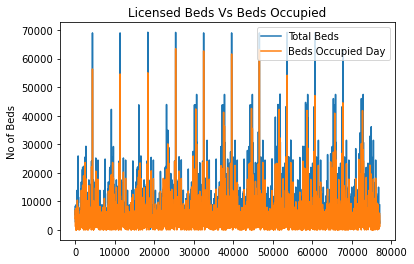

In [28]:
plt.plot(df[['Licensed Bed Day',"Census Day"]])
plt.title("Licensed Beds Vs Beds Occupied")
plt.ylabel("No of Beds")
plt.legend(["Total Beds","Beds Occupied Day"])
plt.show()

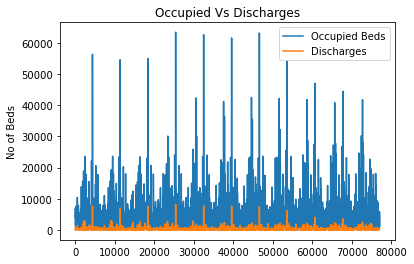

In [29]:
plt.plot(df[['Census Day',"Discharges"]])
plt.title("Occupied Vs Discharges")
plt.ylabel("No of Beds")
plt.legend(["Occupied Beds","Discharges"])
plt.show()

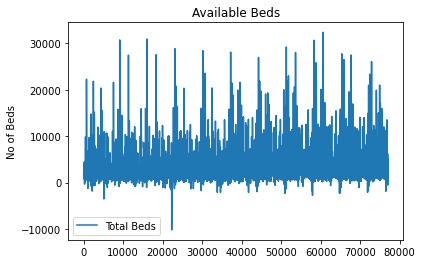

In [30]:
plt.plot(df["available beds"])
plt.title("Available Beds")
plt.ylabel("No of Beds")
plt.legend(["Total Beds","Beds Occupied Day"])
plt.show()

    The Negative Value here shows the shortage of Beds 

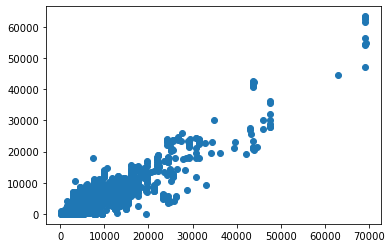

In [31]:
plt.scatter(df["Licensed Bed Day"],df["Census Day"])

In [32]:
import seaborn as sns

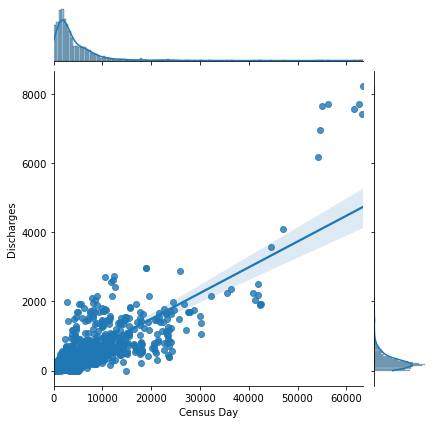

In [33]:
g = sns.jointplot(x="Census Day", y="Discharges", data=df,
                  kind="reg")

    The Point that are far away are Outliers

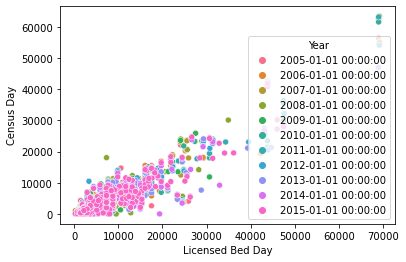

In [34]:
sns.scatterplot(data=df, x="Licensed Bed Day", y="Census Day", hue="Year")

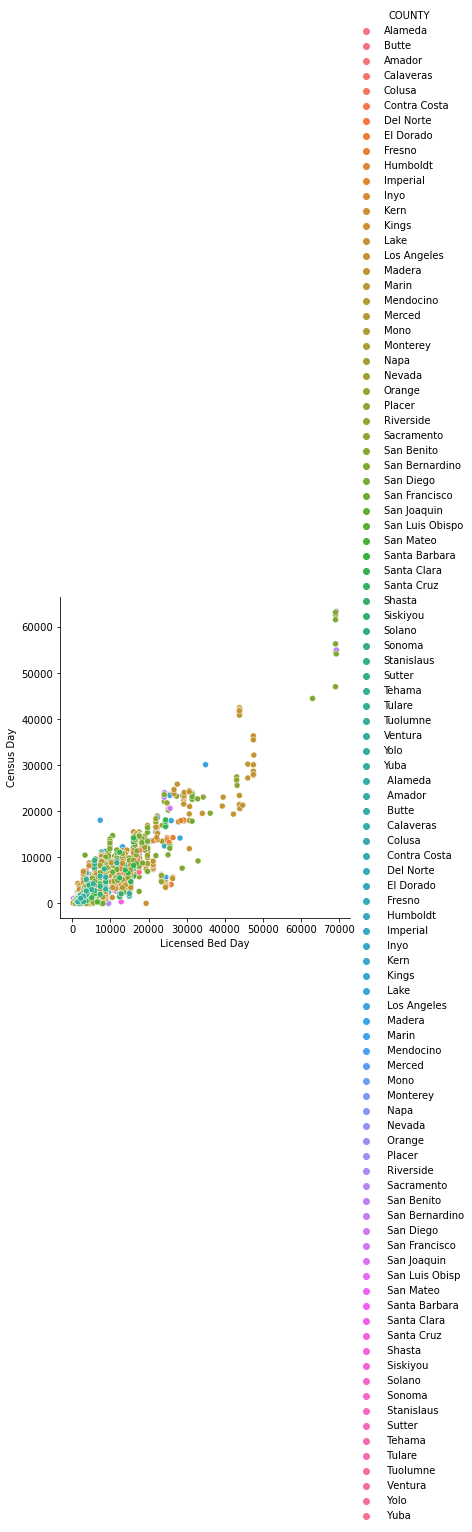

In [35]:
g = sns.relplot(data=df, x="Licensed Bed Day", y="Census Day", hue="COUNTY")

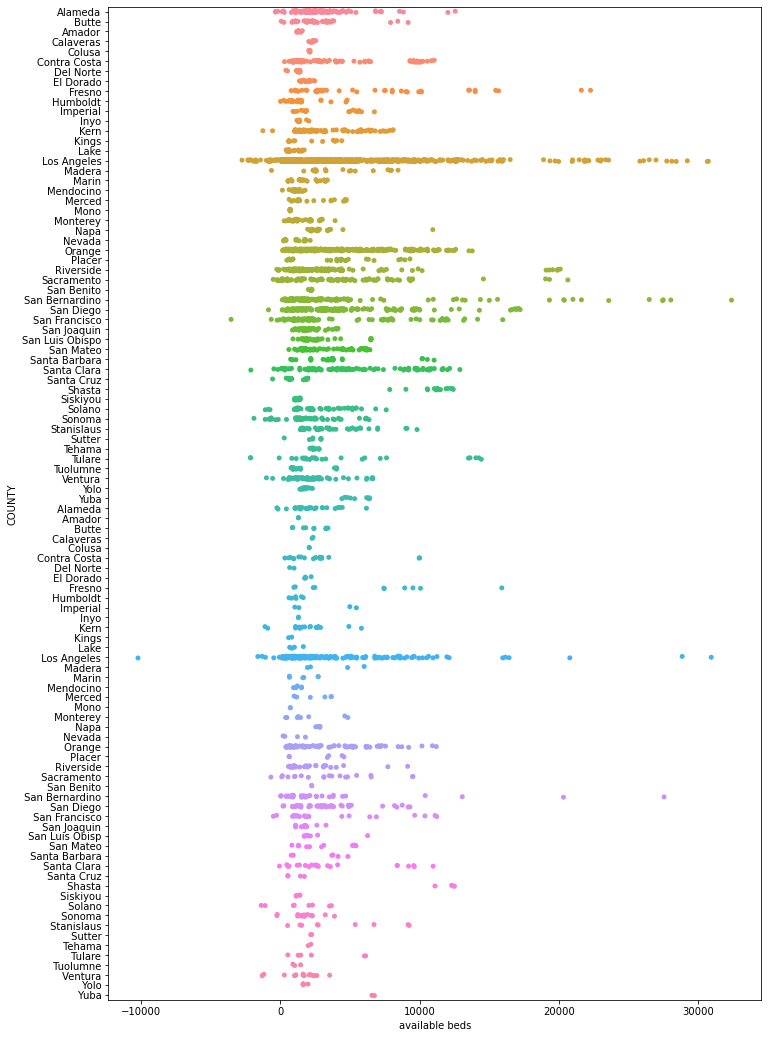

In [36]:
a4_dims = (11.7, 18.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(x="available beds", y="COUNTY", data=df,ax=ax)

In [37]:

df["CL"] = df["COUNTY"].astype('category')

In [38]:
df.dtypes

Year                                          datetime64[ns]
COUNTY                                                object
OSHPD_ID                                             float64
Facility Name                                         object
Licensed Bed Classification                           object
License Bed Designation                               object
Licensed Bed Day                                     float64
Discharges                                           float64
Census Day                                           float64
Intra Hospital Transfer from Critical Care             int64
available beds                                       float64
CL                                                  category
dtype: object

In [39]:
df["County labels"] =df["CL"].cat.codes
df.head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care,available beds,CL,County labels
2,2005-01-01,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326,2047.0,Alameda,50
16,2005-01-01,Alameda,106010739.0,ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS,General Acute Care,Intensive Care,5840.0,486.0,6923.0,1394,797.0,Alameda,50
30,2005-01-01,Alameda,106010776.0,CHILDRENS HOSPITAL AND RESEARCH CTR AT OAKLAND,General Acute Care,Intensive Care,8395.0,731.0,6372.0,1583,4337.0,Alameda,50
58,2005-01-01,Alameda,106010805.0,EDEN MEDICAL CENTER,General Acute Care,Intensive Care,5119.0,372.0,3775.0,637,2353.0,Alameda,50
100,2005-01-01,Alameda,106010846.0,ALAMEDA CO MED CTR - HIGHLAND CAMPUS,General Acute Care,Intensive Care,7300.0,257.0,5218.0,1150,3489.0,Alameda,50


In [40]:
df['FN']=df["Facility Name"].astype('category')

In [41]:
df["Facility Label"]=df["FN"].cat.codes

In [42]:
df.drop(["FN","CL"],axis=1,inplace=True)

In [43]:
df.head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care,available beds,County labels,Facility Label
2,2005-01-01,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326,2047.0,50,4
16,2005-01-01,Alameda,106010739.0,ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS,General Acute Care,Intensive Care,5840.0,486.0,6923.0,1394,797.0,50,7
30,2005-01-01,Alameda,106010776.0,CHILDRENS HOSPITAL AND RESEARCH CTR AT OAKLAND,General Acute Care,Intensive Care,8395.0,731.0,6372.0,1583,4337.0,50,49
58,2005-01-01,Alameda,106010805.0,EDEN MEDICAL CENTER,General Acute Care,Intensive Care,5119.0,372.0,3775.0,637,2353.0,50,105
100,2005-01-01,Alameda,106010846.0,ALAMEDA CO MED CTR - HIGHLAND CAMPUS,General Acute Care,Intensive Care,7300.0,257.0,5218.0,1150,3489.0,50,2


In [44]:
X=df.drop(['OSHPD_ID','available beds','COUNTY','Facility Name','Licensed Bed Classification','License Bed Designation','Year'],axis=1)
X

,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care,County labels,Facility Label
2,2920.0,170.0,1369.0,326,50,4
16,5840.0,486.0,6923.0,1394,50,7
30,8395.0,731.0,6372.0,1583,50,49
58,5119.0,372.0,3775.0,637,50,105
100,7300.0,257.0,5218.0,1150,50,2
...,...,...,...,...,...,...
76946,8760.0,255.0,3121.0,294,97,475
76961,3650.0,165.0,5199.0,837,97,501
77016,2920.0,179.0,1551.0,431,98,594
77030,2190.0,167.0,1093.0,314,98,522


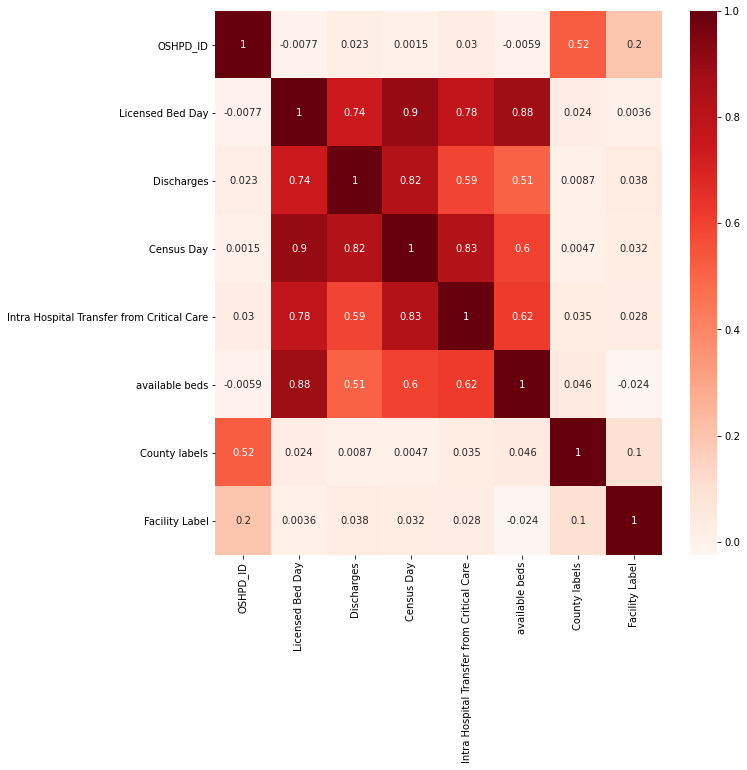

In [45]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
#Correlation with output variable
cor_target = abs(cor["available beds"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Licensed Bed Day                              0.880827
Discharges                                    0.508840
Census Day                                    0.597511
Intra Hospital Transfer from Critical Care    0.619776
available beds                                1.000000
Name: available beds, dtype: float64

In [47]:
Y=df["available beds"].values

In [48]:
X=df[["Licensed Bed Day","Discharges","Census Day","Intra Hospital Transfer from Critical Care"]].values

In [49]:
X

array([[2920.,  170., 1369.,  326.],
       [5840.,  486., 6923., 1394.],
       [8395.,  731., 6372., 1583.],
       ...,
       [2920.,  179., 1551.,  431.],
       [2190.,  167., 1093.,  314.],
       [8760.,  399., 5679., 1556.]])

In [50]:
from sklearn.model_selection import train_test_split 

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=32)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2706, 4), (1161, 4), (2706,), (1161,))

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
regressor = LinearRegression()

In [54]:
regressor.fit(x_train,y_train)

LinearRegression()

In [55]:
regressor.intercept_

-1.3642420526593924e-12

In [56]:
regressor.coef_

array([ 1.,  1., -1.,  1.])

In [57]:
y_pred_test = regressor.predict(x_test)
y_pred_test

array([1411., 1352.,  641., ..., 2156.,  583., 4712.])

In [58]:
y_pred_test.shape

(1161,)

In [59]:
y_pred = regressor.predict(X)
y_pred

array([2047.,  797., 4337., ..., 1979., 1578., 5036.])

In [60]:
y_pred.shape

(3867,)

In [61]:
df["Beds Required('Predicted')"]=y_pred

In [62]:
df.columns

Index(['Year', 'COUNTY', 'OSHPD_ID', 'Facility Name',
       'Licensed Bed Classification', 'License Bed Designation',
       'Licensed Bed Day', 'Discharges', 'Census Day',
       'Intra Hospital Transfer from Critical Care', 'available beds',
       'County labels', 'Facility Label', 'Beds Required('Predicted')'],
      dtype='object')

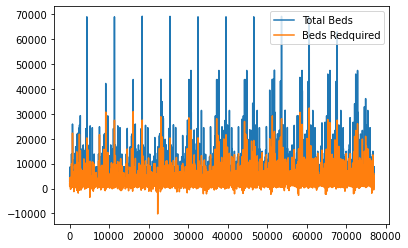

In [63]:
plt.plot(df[["Licensed Bed Day","Beds Required('Predicted')"]])
plt.legend(["Total Beds","Beds Redquired"])

In [64]:
#!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\manis\anaconda3\lib\site-packages (0.11.0)


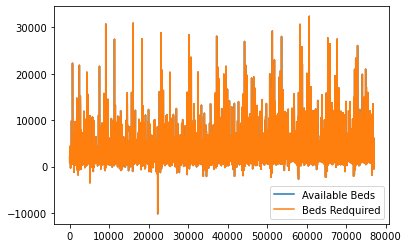

In [65]:
plt.plot(df[["available beds","Beds Required('Predicted')"]])
plt.legend(["Available Beds","Beds Redquired"])

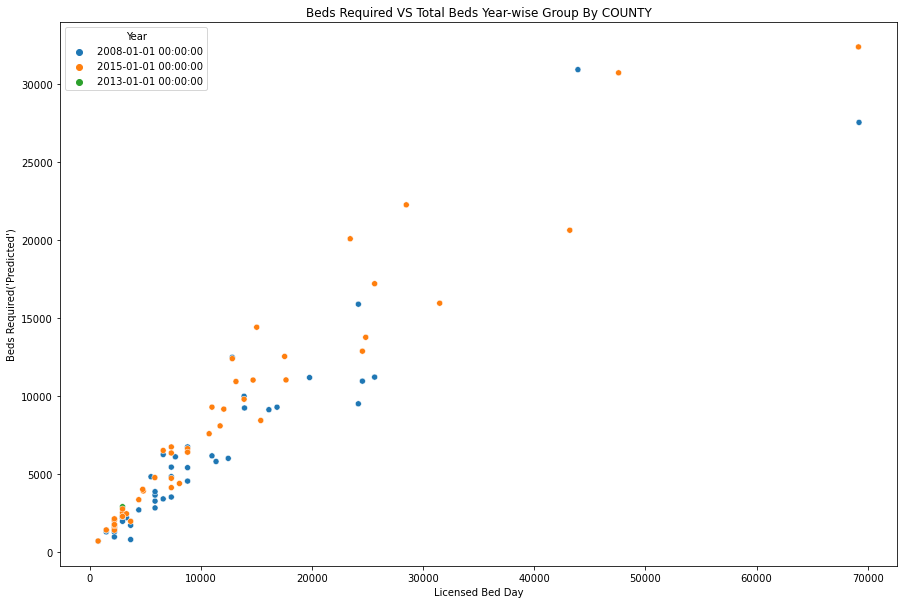

In [66]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Beds Required VS Total Beds Year-wise Group By COUNTY")
sns.scatterplot(data=df.groupby('COUNTY').max(), x="Licensed Bed Day", y="Beds Required('Predicted')",hue="Year",ax=ax)

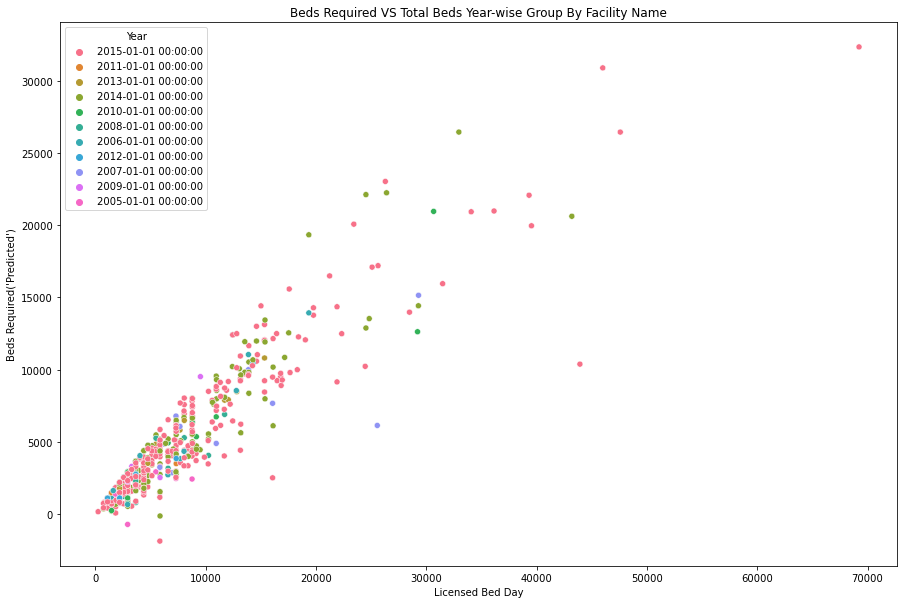

In [67]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Beds Required VS Total Beds Year-wise Group By Facility Name")
sns.scatterplot(data=df.groupby('Facility Name').max(), x="Licensed Bed Day", y="Beds Required('Predicted')",hue="Year",ax=ax)

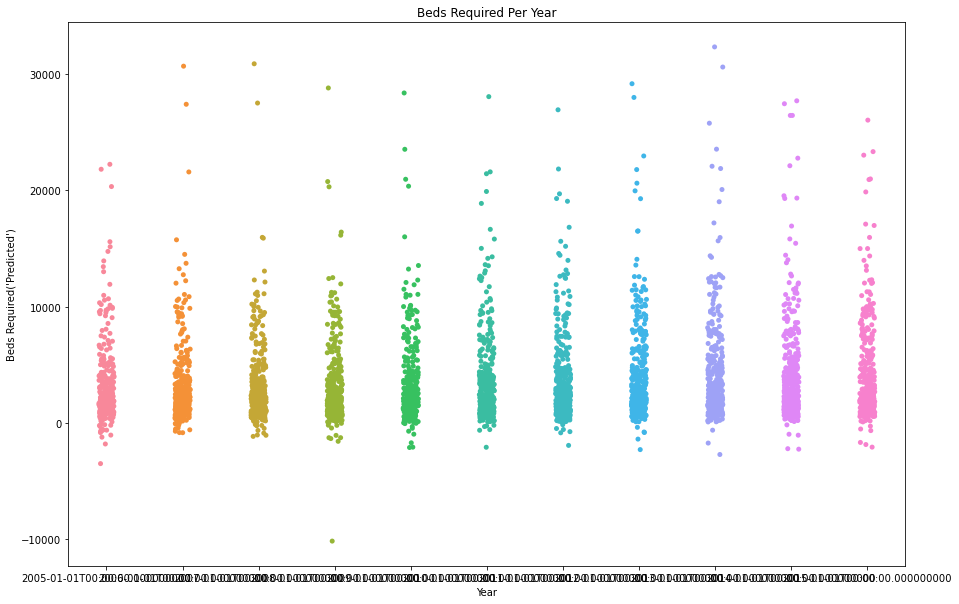

In [68]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title("Beds Required Per Year")
sns.stripplot(data=df, x="Year", y="Beds Required('Predicted')",ax=ax)

In [69]:
df.shape

(3867, 14)

In [70]:
df.to_csv('Data_Predicted.csv')